In [100]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [101]:
class MyConvLayer(nn.Module):
	def __init__(self, in_channels=1, out_channels=1, kernel_size=(1,1), stride=1, padding=0):
		super().__init__()
		#TODO: Deal with channels, stride, pading
		assert in_channels > 0 and out_channels > 0
		assert kernel_size[0] > 0 and kernel_size[1] > 0
		assert stride > 0
		assert padding >= 0

		self.kern = nn.Parameter(torch.rand(kernel_size))
		self.p , self.q = kernel_size
		self.stride = stride
		self.padding = padding
		
	def forward(self, X):
		print("Input shape: ", X.shape)

		output = torch.empty(X.size(0),
				X.size(1) - self.p + 1 + (self.padding*2),
				X.size(2) - self.q + 1 + (self.padding*2))

		# Pad
		print("Padding: ", self.padding)
		X = torch.cat((torch.zeros((1, self.padding, X.shape[2])), X), dim=1) # Top
		X = torch.cat((torch.zeros((1, X.shape[1], self.padding)), X), dim=2) # Left
		X = torch.cat((X, torch.zeros((1, X.shape[1], self.padding))), dim=2) # Right
		X = torch.cat((X, torch.zeros((1, self.padding, X.shape[2]))), dim=1) # Bottom
		
		print("Shape after pad: ", X.shape)

		# Kernel calculation: Minus (self.p + 1)
		# Padding calculation: Plus (self.padding)
		# Stride calculation: Minus (self.stride)
		

		
		print("Output shape: ", output.shape)

		for i in range(output.size(1)):
			for j in range(output.size(2)):
				sub_img = X[:, i:(i + self.p), j:(j + self.q)]
				output[:, i, j] = (sub_img*self.kern).sum(dim=(1,2))

		return output

# Define sobel kernels

In [102]:
positive_X_sobel = torch.tensor([[1, 0, -1],
                                 [2, 0, -2],
                                 [1, 0, -1]])

negative_X_sobel = torch.tensor([[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]])

negative_Y_sobel = torch.tensor([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]])

positive_Y_sobel = torch.tensor([[-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]])

# Get sample image from Fashion MINST

In [103]:
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.ToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1)
img, _ = next(iter(train_dataloader))

# Regular conv

Input shape:  torch.Size([1, 28, 28])
Padding:  0
Shape after pad:  torch.Size([1, 28, 28])
Output shape:  torch.Size([1, 26, 26])


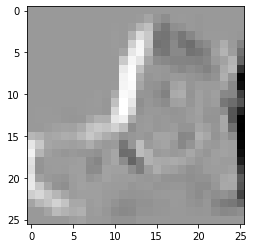

In [104]:
myConvLayer = MyConvLayer(kernel_size=(3,3))
myConvLayer.kern.requires_grad=False

myConvLayer.kern[:] = positive_X_sobel
img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')

# Padding

Input shape:  torch.Size([1, 28, 28])
Padding:  14
Shape after pad:  torch.Size([1, 56, 56])
Output shape:  torch.Size([1, 54, 54])


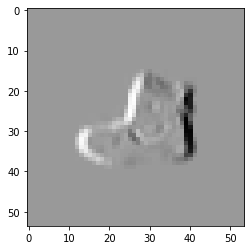

In [105]:
myConvLayer = MyConvLayer(kernel_size=(3,3), padding=14)
myConvLayer.kern.requires_grad=False

myConvLayer.kern[:] = positive_X_sobel
img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')

# Stride

Input shape:  torch.Size([1, 28, 28])
Padding:  0
Shape after pad:  torch.Size([1, 28, 28])
Output shape:  torch.Size([1, 26, 26])


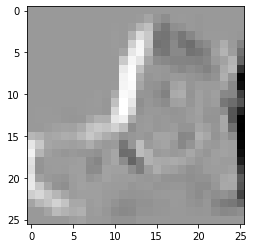

In [106]:
myConvLayer = MyConvLayer(kernel_size=(3,3), stride=2)
myConvLayer.kern.requires_grad=False

myConvLayer.kern[:] = positive_X_sobel
img2= myConvLayer(img.reshape(1,28,28))
plt.imshow(img2.detach().squeeze(),cmap='Greys')

## Define the conv layer size, stride and more

In [107]:
# myConvLayer = MyConvLayer(kernel_size=(3,3))
# myConvLayer.kern.requires_grad=False

## Positive X sobel

In [108]:
# myConvLayer.kern[:] = positive_X_sobel
# img2= myConvLayer(img.reshape(1,28,28))
# plt.imshow(img2.detach().squeeze(),cmap='Greys')

## Negative X sobel

In [109]:
# myConvLayer.kern[:] = negative_X_sobel
# img2= myConvLayer(img.reshape(1,28,28))
# plt.imshow(img2.detach().squeeze(),cmap='Greys')

## Positive Y sobel

In [110]:
# myConvLayer.kern[:] = positive_Y_sobel
# img2= myConvLayer(img.reshape(1,28,28))
# plt.imshow(img2.detach().squeeze(),cmap='Greys')

## Negative Y sobel

In [111]:
# myConvLayer.kern[:] = negative_Y_sobel
# img2= myConvLayer(img.reshape(1,28,28))
# plt.imshow(img2.detach().squeeze(),cmap='Greys')

# Read only if you want to understand

### Padding example

In [112]:
img = torch.ones((1, 5, 5))

padding = 2

print("Top:", torch.cat((torch.zeros((1, padding, 5)), img), dim=1)) # Top

print("Left: ", torch.cat((torch.zeros((1, 5, padding)), img), dim=2)) # Left

print("Right: ", torch.cat((img, torch.zeros((1, 5, padding))), dim=2)) # Right

print("Bottom: ", torch.cat((img, torch.zeros((1, padding, 5))), dim=1)) # Bottom


Top: tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])
Left:  tensor([[[0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1.]]])
Right:  tensor([[[1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 0., 0.]]])
Bottom:  tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
